# Analysis 2 : Sentimental and Text Analysis  

We divide the analysis in Four Parts :-

A) Find the **Overall Satisfaction Score (OSAT = Average of all scores)** from all types of scores given by real time customer revwiews but keeping number of reviews in option.

B) Find **Hotel IDs** from **CSV** and collect reviews of hotels from **TripAdvisor API key call** and **Expedia web scraping.**(TripAdvisor does not provide API key for research purpose and one has to purchase for one year period So we scrape the data.)

C) Perform **Sentimental Analysis** using **NLTK and NLTK API** for both reviews on Tripadvisor and Expedia to understand what customers say on two of the most heavily used websites.

D)  Perform **Sentimental Analysis** using Microsoft Cognitive Sentimental API to have an overall setomental score and **Text Analysis** using Microsoft Cognitive KeyPhrase API to have top three key words used from Expedia API data across all Expedia hotels


# A) Overall Satisfaction Score (OSAT = Average of all scores)


In [2]:
import pandas as pd
import matplotlib as plt
import numpy as np
import re
import requests
import logging
import os
import json
import html5lib
from bs4 import BeautifulSoup
import glob,string #Importing glob for iterations and storing
import seaborn as sns
%matplotlib inline
from matplotlib import *
import sys
from pylab import *
import urllib.request
import glob
import nltk

In [3]:
currentWD = os.getcwd()
currentWD

'C:\\Users\\Jay Padhya\\Documents\\Python_FinalProject'

In [5]:
test_data = pd.read_csv(currentWD+"/"+'test.csv')

# A) Analysis 1 : Find OSAT scores from API calls for hotels

# Step 1:

We use **TripAdvisor API key** for fecthing reviews for all hotel IDs in JSON and parse the file to fetch HotelReviews, RoomCleanliness Score, Room comfort score and Hotel Condition Score.  

In [6]:
test_data_booking = test_data.groupby('srch_destination_id').sum()
test_data_booking = test_data_booking.sort('is_booking',ascending = False)
#data_booking =pd.DataFrame(test_data_booking.reset_index) 
test_data_booking['srch_destination_id'] = test_data_booking.index # This will ensure that 'srch_destination_id' appears at the end
top_ten_hotel_destinations = test_data_booking.head(15)
hotel_ids = top_ten_hotel_destinations['srch_destination_id']
#hotel_ids To fetch the top ten values for hotel destination IDs

C:\Users\Jay Padhya\Anaconda3\New\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [11]:
expedia_API_key = os.getenv('auth_key')
#print(expedia_API_key)

In [12]:
data = []
for x in hotel_ids:
    r = requests.get("http://terminal2.expedia.com/x/reviews/hotels?hotelId="+x+"&apikey="+expedia_API_key+"summary?sortBy=DATEASC")
    data = r.json()
#data #To see the JSON Data coming in Data for Hotel IDS
with open('final_reviews.json', 'w') as outfile:
        json.dump(data, outfile)

In [24]:
files=glob.glob(currentWD+'/Expedia_API_JSON/*')
textbody=[]
reco = []
for file in files:
    print(file) # the list of files for referring
    with open(file) as data_file:    
        data = json.load(data_file)
        x = data['results']['hotereviews']

C:\Users\Jay Padhya\Documents\Python_FinalProject/Expedia_API_JSON\trial.json


In [41]:
hotelid = []
ratingRoomCleanliness = []
ratingRoomComfort = []
ratingHotelCondition = []
hotelReview = []
for y in x:
    hotelid.append((y['hotelID']))
    ratingRoomCleanliness.append((y['ratingRoomCleanliness']))
    ratingRoomComfort.append((y['ratingRoomComfort']))
    ratingHotelCondition.append((y['ratingHotelCondition']))
    hotelReview.append((y['hotelReview']))
finalsummary= (list(zip(hotelid,ratingRoomCleanliness,ratingRoomComfort,ratingHotelCondition,hotelReview)))
finallist = sorted(finalsummary, reverse = True) # Reverse sorting to know which are top notch recommended comments
toptencomments = finallist[:10]
#toptencomments  #prints what is needed

• Now we will store the result in CSV for further analysis. 

In [ ]:
import csv
with open('reviews_clean_flitered.txt','w') as fp: #Command to make csv
    a = csv.writer(fp, delimiter = ',',lineterminator='\n')
    a.writerows(toptencomments,) #writerows and writerow would give a single row

# Step 2 

- **Using the saved CSV data set we will load Hotel Review scores and find Overall Satsifaction score as single point of reference for a particular hotel**

In [7]:
data_review = pd.read_csv('reviews_clean_flitered.txt',names=["hotelID","Expedia_User_Comments","Expedia_Cleanliness","Expedia_RoomComfort","Expedia_HotelCondition"],sep="^")
# We will now convert all SERIES objects into FLOATs by using convert_numeric as true

data_review['Expedia_Cleanliness'] = data_review['Expedia_Cleanliness'].convert_objects(convert_numeric = True)
data_review['Expedia_RoomComfort'] = data_review['Expedia_RoomComfort'].convert_objects(convert_numeric = True)
data_review['Expedia_HotelCondition'] = data_review['Expedia_HotelCondition'].convert_objects(convert_numeric = True)
data_review['Expedia_Cleanliness'] = data_review['Expedia_Cleanliness'].astype(float)
data_review['Expedia_RoomComfort'] = data_review['Expedia_RoomComfort'].astype(float)
data_review['Expedia_HotelCondition'] = data_review['Expedia_HotelCondition'].astype(float)

C:\Users\Jay Padhya\Anaconda3\New\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Jay Padhya\Anaconda3\New\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Jay Padhya\Anaconda3\New\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Jay Padhya\Anaconda3\New\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [8]:
df = data_review.groupby('hotelID').count()
# To find the number of surveys given 
df_count = df.sort('Expedia_Cleanliness',ascending=False)
df_count['hotelID'] = df_count.index 
df_count.head(3)

C:\Users\Jay Padhya\Anaconda3\New\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,Expedia_User_Comments,Expedia_Cleanliness,Expedia_RoomComfort,Expedia_HotelCondition,hotelID
hotelID,,,,,
8253,177,177,177,177,8253
8279,120,120,120,120,8279
8230,100,100,100,100,8230


In [9]:
# Now for the Sum of all the scores on surveys
df_sum = data_review.groupby('hotelID').sum()
df_sum = df_sum.sort('Expedia_Cleanliness',ascending=False)
df_sum['hotelID'] = df_count.index 
df_sum.head(3)

C:\Users\Jay Padhya\Anaconda3\New\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,Expedia_Cleanliness,Expedia_RoomComfort,Expedia_HotelCondition,hotelID
hotelID,,,,
8253,762.0,726.0,675.0,8253
8230,446.0,425.0,410.0,8279
8279,444.0,435.0,399.0,8230


In [10]:
expedia_API_OSAT_score = pd.DataFrame()
expedia_API_OSAT_score['Cleanliness_Average'] = df_sum['Expedia_Cleanliness']/ df_count['Expedia_Cleanliness']
expedia_API_OSAT_score['RoomComfort_Average'] = df_sum['Expedia_RoomComfort']/ df_count['Expedia_RoomComfort']
expedia_API_OSAT_score['HotelCondition_Average'] = df_sum['Expedia_HotelCondition']/ df_count['Expedia_HotelCondition']
expedia_API_OSAT_score['Number_Of_Reviews'] = df_count['Expedia_HotelCondition']

In [11]:
expedia_API_OSAT_score['hotelID'] = expedia_API_OSAT_score.index
expedia_API_OSAT_score = expedia_API_OSAT_score.sort('Number_Of_Reviews',ascending=False)

C:\Users\Jay Padhya\Anaconda3\New\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [12]:
expedia_API_OSAT_score.head(3)

,Cleanliness_Average,RoomComfort_Average,HotelCondition_Average,Number_Of_Reviews,hotelID
hotelID,,,,,
8253,4.305085,4.101695,3.813559,177,8253
8279,3.700000,3.625000,3.325000,120,8279
8230,4.460000,4.250000,4.100000,100,8230


In [13]:
expedia_API_OSAT_score['OSAT_SCORE'] = (expedia_API_OSAT_score['Cleanliness_Average'] + expedia_API_OSAT_score['RoomComfort_Average']+expedia_API_OSAT_score['HotelCondition_Average'])/3  

In [14]:
expedia_API_OSAT_score.head(2)

,Cleanliness_Average,RoomComfort_Average,HotelCondition_Average,Number_Of_Reviews,hotelID,OSAT_SCORE
hotelID,,,,,,
8253,4.305085,4.101695,3.813559,177,8253,4.073446
8279,3.700000,3.625000,3.325000,120,8279,3.550000


In [15]:
# We calculate the distribution of 
expedia_API_OSAT_score_df = expedia_API_OSAT_score[expedia_API_OSAT_score['Number_Of_Reviews']>4]
expedia_API_OSAT_score_df.head(3)

,Cleanliness_Average,RoomComfort_Average,HotelCondition_Average,Number_Of_Reviews,hotelID,OSAT_SCORE
hotelID,,,,,,
8253,4.305085,4.101695,3.813559,177,8253,4.073446
8279,3.700000,3.625000,3.325000,120,8279,3.550000
8230,4.460000,4.250000,4.100000,100,8230,4.270000


In [16]:
bins = list(range(0,7,1))
solution = pd.cut(expedia_API_OSAT_score_df['OSAT_SCORE'],bins, labels = list(range(0,6,1))).value_counts()
soultion_df = pd.DataFrame({'Osat_Score':solution.index,'Number_Of_Reviews':solution.values})

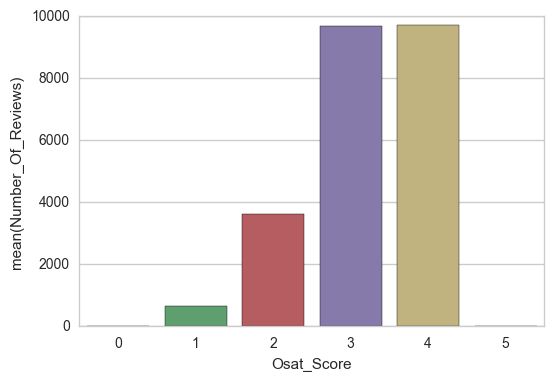

In [18]:
sns.set_style("whitegrid")
sns.barplot(x='Osat_Score',y ='Number_Of_Reviews',data=soultion_df )

# Conclusion : We can see most of the ratings between 3 & 4 indicating many reviews are mostly neutral or promoters  

In [ ]:
expedia_API_OSAT_score.to_csv("expedia_API_OSAT_score.csv")

# ============================================

# ANALYSIS B : 

Find **Hotel IDs** from **CSV** and collect reviews of hotels from **Expedia API key call** and **TripAdvisor web scraping.** (TripAdvisor does not provide API key for research hence I chose to scrape the data.)


- This provides us with dataframe have Expedia's hotel Reviews,Cleanliness Scores,RoomComfort Score and HotelCondition Score for top hotels on basis of number of User comments. Then we will **combine reviews** from **Expedia** and **TripAdvisor** on **top 10** hotels and perform **Sentimental Analysis** for customers saying on both websites.

In [19]:
expedia_OSAT_count = data_review.groupby('hotelID').count()
expedia_OSAT_count = expedia_OSAT_count.sort('Expedia_User_Comments',ascending = False)
expedia_OSAT_count.head(3)

C:\Users\Jay Padhya\Anaconda3\New\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Expedia_User_Comments,Expedia_Cleanliness,Expedia_RoomComfort,Expedia_HotelCondition
hotelID,,,,
8253,177,177,177,177
8279,120,120,120,120
8230,100,100,100,100


In [96]:
# Because sum will add all the commnents in single row and not compute the sum for scores, we only take ccolumns we need
data_review_sum = data_review[['hotelID','Expedia_Cleanliness','Expedia_RoomComfort','Expedia_HotelCondition']]
expedia_OSAT_sum =  data_review_sum.groupby('hotelID').sum()
expedia_OSAT_sum= expedia_OSAT_sum.sort('Expedia_Cleanliness',ascending = False)
expedia_OSAT_sum['hotelID'] = expedia_OSAT_sum.index
expedia_OSAT_sum.head(3)

C:\Users\Jay Padhya\Anaconda3\New\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Expedia_Cleanliness,Expedia_RoomComfort,Expedia_HotelCondition,hotelID
hotelID,,,,
8253,762.0,726.0,675.0,8253
8230,446.0,425.0,410.0,8230
8279,444.0,435.0,399.0,8279


In [106]:
expedia_OSAT_sum = expedia_OSAT_sum.rename(index = str,columns = {"Expedia_Cleanliness":"Cleanliness_Sum","Expedia_RoomComfort":"Comfort_Sum","Expedia_HotelCondition":"Condition_Sum"} )
expedia_OSAT_sum.head(5)
expedia_OSAT_count = expedia_OSAT_count.rename(index = str,columns = {"Expedia_Cleanliness":"Cleanliness_Sum","Expedia_RoomComfort":"Comfort_Sum","Expedia_HotelCondition":"Condition_Sum"})

,Cleanliness_Sum,Comfort_Sum,Condition_Sum,hotelID
hotelID,,,,
8253,762.0,726.0,675.0,8253
8230,446.0,425.0,410.0,8230
8279,444.0,435.0,399.0,8279
8745,347.0,316.0,326.0,8745
12206,323.0,313.0,279.0,12206


In [107]:
expedia_OSAT_count.head(3)

,Expedia_User_Comments,Cleanliness_Count,Expedia_RoomComfort,Expedia_HotelCondition
hotelID,,,,
8253,177,177,177,177
8279,120,120,120,120
8230,100,100,100,100


In [10]:
data_review.head(4)

,hotelID,Expedia_User_Comments,Expedia_Cleanliness,Expedia_RoomComfort,Expedia_HotelCondition
0,893,Very clean and modern. The staff were always...,5.0,5.0,5.0
1,893,Have stayed at many hotels in Daytona and Orm...,5.0,5.0,5.0
2,893,Beautiful ocean view and great pool!Parking i...,5.0,5.0,5.0
3,893,The staff was very helpful and they were all ...,5.0,5.0,5.0


In [51]:
data_frame_Expedia_comments = data_review
#data_frame_Expedia_comments['hotelID'] = data_frame_Expedia_comments.index
expedia_all_comments = data_frame_Expedia_comments.loc[(data_frame_Expedia_comments['hotelID']==8253) | (data_frame_Expedia_comments['hotelID']==8279) |(data_frame_Expedia_comments['hotelID']==8230) |(data_frame_Expedia_comments['hotelID']==8745) |(data_frame_Expedia_comments['hotelID']==12206) |(data_frame_Expedia_comments['hotelID']==8267) |(data_frame_Expedia_comments['hotelID']==8268) |(data_frame_Expedia_comments['hotelID']==8278) |(data_frame_Expedia_comments['hotelID']==8250) |(data_frame_Expedia_comments['hotelID']==13316)]
#expedia_all_comments   The table shows all the comments

In [10]:
filepath = currentWD+"/"+"TripAdvisor\Artisan Hotel_Las Vegas_8253\p*"
for files in glob.glob(filepath,recursive = True): #fetching values
    artisan_hotel_las_vegas = BeautifulSoup(open(files,'r',encoding="utf8").read())
filepath = currentWD+"/"+"TripAdvisor\BEST_WESTERN_PLUS_California_West Hotel_8279\p*"
for files in glob.glob(filepath,recursive = True): #fetching values
    best_western = BeautifulSoup(open(files,'r',encoding="utf8").read())
filepath = currentWD+"/"+"TripAdvisor\Fairfield_VA_Mains_12206\p*"
for files in glob.glob(filepath,recursive = True): #fetching values
    fairfield_va_mains = BeautifulSoup(open(files,'r',encoding="utf8").read())
filepath = currentWD+"/"+"TripAdvisor\Fortune_Hotel_Suites_SNG_8230\p*"
for files in glob.glob(filepath,recursive = True): #fetching values
    fortune_suites = BeautifulSoup(open(files,'r',encoding="utf8").read())
filepath = currentWD+"/"+"TripAdvisor\Holiday_Inn_Express_South Hotel_8745\p*"
for files in glob.glob(filepath,recursive = True): #fetching values
    holiday_inn_express = BeautifulSoup(open(files,'r',encoding="utf8").read())   
filepath = currentWD+"/"+"TripAdvisor\Orchids_Hampton Inn_8267\p*"
for files in glob.glob(filepath,recursive = True): #fetching values
    orchids_hampton_inn = BeautifulSoup(open(files,'r',encoding="utf8").read())
filepath = currentWD+"/"+"TripAdvisor\Residence_Inn_Hughes_Hotel_8268\p*"
for files in glob.glob(filepath,recursive = True): #fetching values
    residence_inn_hughes = BeautifulSoup(open(files,'r',encoding="utf8").read())  
filepath = currentWD+"/"+"TripAdvisor\Royal Resorts_8278\p*"
for files in glob.glob(filepath,recursive = True): #fetching values
    royal_resorts = BeautifulSoup(open(files,'r',encoding="utf8").read())
filepath = currentWD+"/"+"TripAdvisor\Skylofts_MGMGrand Hotel_8250\p*"
for files in glob.glob(filepath,recursive = True): #fetching values
    skylofts_MGM_brand = BeautifulSoup(open(files,'r',encoding="utf8").read()) 
filepath = currentWD+"/"+"TripAdvisor\Summerlin_Hotel_13316\p*"
for files in glob.glob(filepath,recursive = True): #fetching values
    summerlin_hotel = BeautifulSoup(open(files,'r',encoding="utf8").read())

C:\Users\Jay Padhya\Anaconda3\New\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 184 of the file C:\Users\Jay Padhya\Anaconda3\New\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [ ]:
artisan_hotel_las_vegas
best_western
fairfield_va_mains
fortune_suites
holiday_inn_express
orchids_hampton_inn
residence_inn_hughes
royal_resorts
skylofts_MGM_brand
summerlin_hotel

In [12]:
# Function to free the text from all HTML tags 
def cleanhtml(raw_html):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr,' ', raw_html)
    return cleantext

In [16]:
# Converting the Beautiful Soup Object to String, removing punctuations, Removing HTML Tags
artisan_hotel_las_vegas = str(artisan_hotel_las_vegas)
artisan_hotel_las_vegas = cleanhtml(artisan_hotel_las_vegas) 
no_punc_artisan_hotel_las_vegas = [c for c in artisan_hotel_las_vegas if c not in string.punctuation]
no_punc_artisan_hotel_las_vegas =''.join(artisan_hotel_las_vegas)
# Creating a data series and adding it to data frame with correct identifier
seri1_data = pd.Series(no_punc_artisan_hotel_las_vegas)
df_no_punc_artisan_hotel_las_vegas_8253 = pd.DataFrame(seri1_data,columns=['TripAdvisor Review'])
df_no_punc_artisan_hotel_las_vegas_8253['hotelID'] = 8253

In [29]:
# Converting the Beautiful Soup Object to String, removing punctuations, Removing HTML Tags
best_western = str(best_western)
best_western = cleanhtml(best_western) 
no_punc_best_western = [c for c in best_western if c not in string.punctuation]
no_punc_best_western =''.join(best_western)
# Creating a data series and adding it to data frame with correct identifier
seri1_data = pd.Series(no_punc_best_western)
df_no_punc_best_western_8279 = pd.DataFrame(seri1_data,columns=['TripAdvisor Review'])
df_no_punc_best_western_8279['hotelID'] = 8279
final = df_no_punc_best_western_8279.merge(df_no_punc_artisan_hotel_las_vegas_8253, how = 'outer')

In [30]:
# Converting the Beautiful Soup Object to String, removing punctuations, Removing HTML Tags
fairfield = str(fairfield_va_mains)
fairfield = cleanhtml(fairfield) 
no_punc_fairfield = [c for c in fairfield if c not in string.punctuation]
no_punc_fairfield =''.join(fairfield)
# Creating a data series and adding it to data frame with correct identifier
seri1_data = pd.Series(no_punc_fairfield)
df_no_punc_fairfield_12206 = pd.DataFrame(seri1_data,columns=['TripAdvisor Review'])
df_no_punc_fairfield_12206['hotelID'] = 12206
df_no_punc_fairfield_12206
final = final.merge(df_no_punc_fairfield_12206,how='outer')
#final

In [31]:
# Converting the Beautiful Soup Object to String, removing punctuations, Removing HTML Tags
fortune_suites = str(fortune_suites)
fortune_suites = cleanhtml(fortune_suites) 
no_punc_fortune_suites = [c for c in fortune_suites if c not in string.punctuation]
no_punc_fortune_suites =''.join(fortune_suites)
# Creating a data series and adding it to data frame with correct identifier
seri1_data = pd.Series(no_punc_fortune_suites)
df_no_punc_fortune_suites_8230 = pd.DataFrame(seri1_data,columns=['TripAdvisor Review'])
df_no_punc_fortune_suites_8230['hotelID'] = 8230
final = final.merge(df_no_punc_fortune_suites_8230,how='outer')
#final

In [32]:
# Converting the Beautiful Soup Object to String, removing punctuations, Removing HTML Tags
holiday_inn_express = str(holiday_inn_express)
holiday_inn_express = cleanhtml(holiday_inn_express) 
no_punc_holiday_inn_express = [c for c in holiday_inn_express if c not in string.punctuation]
no_punc_holiday_inn_express =''.join(holiday_inn_express)
# Creating a data series and adding it to data frame with correct identifier
seri1_data = pd.Series(no_punc_holiday_inn_express)
df_no_punc_fortune_suites_8745 = pd.DataFrame(seri1_data,columns=['TripAdvisor Review'])
df_no_punc_fortune_suites_8745['hotelID'] = 8745
df_no_punc_fortune_suites_8745
final = final.merge(df_no_punc_fortune_suites_8745,how='outer')
#final

In [33]:
# Converting the Beautiful Soup Object to String, removing punctuations, Removing HTML Tags
holiday_inn_express = str(holiday_inn_express)
holiday_inn_express = cleanhtml(holiday_inn_express) 
no_punc_holiday_inn_express = [c for c in holiday_inn_express if c not in string.punctuation]
no_punc_holiday_inn_express =''.join(holiday_inn_express)
# Creating a data series and adding it to data frame with correct identifier
seri1_data = pd.Series(no_punc_holiday_inn_express)
df_no_punc_holiday_inn_express_8745 = pd.DataFrame(seri1_data,columns=['TripAdvisor Review'])
df_no_punc_holiday_inn_express_8745['hotelID'] = 8745
df_no_punc_holiday_inn_express_8745
final = final.merge(df_no_punc_holiday_inn_express_8745,how='outer')
#final

In [34]:
# Converting the Beautiful Soup Object to String, removing punctuations, Removing HTML Tags
orchid_8267 = str(orchids_hampton_inn)
orchid_8267 = cleanhtml(orchid_8267) 
no_punc_orchid_8267 = [c for c in orchid_8267 if c not in string.punctuation]
no_punc_orchid_8267 =''.join(orchid_8267)
# Creating a data series and adding it to data frame with correct identifier
seri1_data = pd.Series(no_punc_orchid_8267)
df_no_punc_orchid_8267 = pd.DataFrame(seri1_data,columns=['TripAdvisor Review'])
df_no_punc_orchid_8267['hotelID'] = 8267
df_no_punc_orchid_8267
final = final.merge(df_no_punc_orchid_8267,how='outer')
#final

In [35]:
# Converting the Beautiful Soup Object to String, removing punctuations, Removing HTML Tags
residence_inn = str(residence_inn_hughes)
residence_inn = cleanhtml(residence_inn) 
no_punc_residence_inn = [c for c in residence_inn if c not in string.punctuation]
no_punc_residence_inn =''.join(residence_inn)
# Creating a data series and adding it to data frame with correct identifier
seri1_data = pd.Series(no_punc_residence_inn)
df_no_punc_residence_inn_8268 = pd.DataFrame(seri1_data,columns=['TripAdvisor Review'])
df_no_punc_residence_inn_8268['hotelID'] = 8268
df_no_punc_residence_inn_8268
final = final.merge(df_no_punc_residence_inn_8268,how='outer')
#final

In [36]:
# Converting the Beautiful Soup Object to String, removing punctuations, Removing HTML Tags
royal_resorts = str(royal_resorts)
royal_resorts = cleanhtml(royal_resorts) 
no_punc_royal_resorts = [c for c in royal_resorts if c not in string.punctuation]
no_punc_royal_resorts =''.join(royal_resorts)
# Creating a data series and adding it to data frame with correct identifier
seri1_data = pd.Series(no_punc_royal_resorts)
df_no_punc_royal_resorts_8278 = pd.DataFrame(seri1_data,columns=['TripAdvisor Review'])
df_no_punc_royal_resorts_8278['hotelID'] = 8278
df_no_punc_royal_resorts_8278
final = final.merge(df_no_punc_royal_resorts_8278,how='outer')
#final

In [37]:
# Converting the Beautiful Soup Object to String, removing punctuations, Removing HTML Tags
royal_resorts = str(royal_resorts)
royal_resorts = cleanhtml(royal_resorts) 
no_punc_royal_resorts = [c for c in royal_resorts if c not in string.punctuation]
no_punc_royal_resorts =''.join(royal_resorts)
# Creating a data series and adding it to data frame with correct identifier
seri1_data = pd.Series(no_punc_royal_resorts)
df_no_punc_royal_resorts_8278 = pd.DataFrame(seri1_data,columns=['TripAdvisor Review'])
df_no_punc_royal_resorts_8278['hotelID'] = 8278
df_no_punc_royal_resorts_8278
final = final.merge(df_no_punc_royal_resorts_8278,how='outer')
#final

In [38]:
# Converting the Beautiful Soup Object to String, removing punctuations, Removing HTML Tags
skylofts_MGM_brand = str(skylofts_MGM_brand)
skylofts_MGM_brand = cleanhtml(skylofts_MGM_brand) 
no_punc_skylofts_MGM_brand = [c for c in skylofts_MGM_brand if c not in string.punctuation]
no_punc_skylofts_MGM_brand =''.join(skylofts_MGM_brand)
# Creating a data series and adding it to data frame with correct identifier
seri1_data = pd.Series(no_punc_skylofts_MGM_brand)
df_no_punc_skylofts_MGM_brand_8250 = pd.DataFrame(seri1_data,columns=['TripAdvisor Review'])
df_no_punc_skylofts_MGM_brand_8250['hotelID'] = 8250
df_no_punc_skylofts_MGM_brand_8250
final = final.merge(df_no_punc_skylofts_MGM_brand_8250,how='outer')
#final

In [39]:
# Converting the Beautiful Soup Object to String, removing punctuations, Removing HTML Tags
Summerlin_Hotel = str(summerlin_hotel)
Summerlin_Hotel = cleanhtml(Summerlin_Hotel) 
no_punc_Summerlin_Hotel = [c for c in Summerlin_Hotel if c not in string.punctuation]
no_punc_Summerlin_Hotel =''.join(Summerlin_Hotel)
# Creating a data series and adding it to data frame with correct identifier
seri1_data = pd.Series(no_punc_Summerlin_Hotel)
df_no_punc_Summerlin_Hotel_13316 = pd.DataFrame(seri1_data,columns=['TripAdvisor Review'])
df_no_punc_Summerlin_Hotel_13316['hotelID'] = 13316
#df_no_punc_Summerlin_Hotel_13316
final = final.merge(df_no_punc_Summerlin_Hotel_13316,how='outer')

In [40]:
tripadvisor_reviews = final

In [148]:
comments_merge = pd.merge(expedia_all_comments,tripadvisor_reviews,how='outer',on='hotelID')
comments_merge = comments_merge[['hotelID','Expedia_User_Comments','TripAdvisor Review']]
comments_merge

,hotelID,Expedia_User_Comments,TripAdvisor Review
0,8230,"Hotel was in a good location close to town, h...","Fortune Hotel &amp; Suites, Las Vegas Rev..."
1,8250,"Stayed in Battle Creek for the night, neede...","Skylofts at MGM Grand Hotel, Las Vegas Re..."
2,8253,"Even though we arrived at 8:30AM, the staff w...","Artisan Hotel, Las Vegas Reviews Page 9 ..."
3,8267,could not rest on this softer mattresstold ...,Hampton Inn Las Vegas/Summerlin Hotel Rev...
4,8268,"Stayed for thanksgiving holiday, The entire...",Residence Inn Las Vegas Hughes Center Hot...
5,8278,Staff is very nice. Hotel is dated and mus...,"Royal Resort, Las Vegas Reviews Page 9 G..."
6,8279,Paid cash for my room.they turned around and ...,BEST WESTERN PLUS Las Vegas West Hotel Re...
7,8745,Good location right off Metro at Grands Blvd ...,Holiday Inn Express Las Vegas South Hotel...
8,12206,The room as expected for this type of hotel t...,Fairfield Inn Las Vegas Airport Hotel Rev...
9,13316,This was the first time I reserved a condo th...,Hampton Inn &amp; Suites Las Vegas-Red Ro...


# Analysis 3 : To Perform Sentimental Analysis for Top hotels across both the websites and find the sentiments for each of the reveiws

** STEP 1 **
- Using the above dataframes and passing the data to NLTK API for determining the scores and overall sentiments for top hotels 

In [367]:
tripadvisor_senti_score = comments_merge[['hotelID','TripAdvisor Review']]
tripadvisor_senti_score_8230 = tripadvisor_senti_score.loc[tripadvisor_senti_score['hotelID']==8230]
tripadvisor_senti_score_8250 = tripadvisor_senti_score.loc[tripadvisor_senti_score['hotelID']==8250]
tripadvisor_senti_score_8253 = tripadvisor_senti_score.loc[tripadvisor_senti_score['hotelID']==8253]
tripadvisor_senti_score_8267 = tripadvisor_senti_score.loc[tripadvisor_senti_score['hotelID']==8267]
tripadvisor_senti_score_8268 = tripadvisor_senti_score.loc[tripadvisor_senti_score['hotelID']==8268]
tripadvisor_senti_score_8278 = tripadvisor_senti_score.loc[tripadvisor_senti_score['hotelID']==8278]
tripadvisor_senti_score_8279 = tripadvisor_senti_score.loc[tripadvisor_senti_score['hotelID']==8279]
tripadvisor_senti_score_8745 = tripadvisor_senti_score.loc[tripadvisor_senti_score['hotelID']==8745]
tripadvisor_senti_score_12206 = tripadvisor_senti_score.loc[tripadvisor_senti_score['hotelID']==12206]
tripadvisor_senti_score_13316 = tripadvisor_senti_score.loc[tripadvisor_senti_score['hotelID']==13316]
data = tripadvisor_senti_score_8230['TripAdvisor Review']
data1 = tripadvisor_senti_score_8250['TripAdvisor Review']
data2 = tripadvisor_senti_score_8253['TripAdvisor Review']
data3 = tripadvisor_senti_score_8267['TripAdvisor Review']
data4 = tripadvisor_senti_score_8268['TripAdvisor Review']
data5 = tripadvisor_senti_score_8278['TripAdvisor Review']
data6 = tripadvisor_senti_score_8279['TripAdvisor Review']
data7 = tripadvisor_senti_score_8745['TripAdvisor Review']
data8 = tripadvisor_senti_score_12206['TripAdvisor Review']
data9 = tripadvisor_senti_score_13316['TripAdvisor Review']

In [410]:
data = urllib.parse.urlencode({"text": data9}) 
r = requests.post("http://text-processing.com/api/sentiment/",data)
sentiment_artisaan = r.text

In [411]:
list_text = sentiment_artisaan.split()

In [412]:
def sentiment_score(text_for_senti_score):
    list_text =  text_for_senti_score.split()
    neg_score = list_text[2]
    neg_score = neg_score.replace(",","")
    neutral_score = list_text[4]
    neutral_score = neutral_score.replace(",","")
    pos_score = list_text[6]
    pos_score = pos_score.replace(",","")
    pos_score = pos_score.replace("}","")
    osat_label = list_text[8]
    osat_label = osat_label.replace("}","") 
    return neg_score,neutral_score,pos_score,osat_label
    
text_review = sentiment_score(sentiment_artisaan)  
for x in text_review:
    print((x))

0.5328529428068649
0.88346269714493442
0.4671470571931351
"neutral"


In [413]:
tripadvisor_senti_score.iloc[9,2] = text_review[0]
tripadvisor_senti_score.iloc[9,3] = text_review[1]
tripadvisor_senti_score.iloc[9,4] = text_review[2]
tripadvisor_senti_score.iloc[9,5] = text_review[3]
tripadvisor_senti_score = tripadvisor_senti_score 
tripadvisor_senti_score

,hotelID,TripAdvisor Review,Trip_neg_score,Trip_neut_score,Trip_pos_score,Trip_osat_label
0,8230,"Fortune Hotel &amp; Suites, Las Vegas Rev...",0.57644406213452526,0.46288796932487891,0.4235559378654748,"""neg"""
1,8250,"Skylofts at MGM Grand Hotel, Las Vegas Re...",0.46084882864513166,0.51975528254052261,0.53915117135486834,pos
2,8253,"Artisan Hotel, Las Vegas Reviews Page 9 ...",0.59784967710264247,0.87718311597908605,0.40215032289735747,"""neutral"""
3,8267,Hampton Inn Las Vegas/Summerlin Hotel Rev...,0.4769793044685704,0.89009421277786016,0.5230206955314296,"""neutral"""
4,8268,Residence Inn Las Vegas Hughes Center Hot...,0.55089621341591488,0.72506910879172215,0.44910378658408512,"""neutral"""
5,8278,"Royal Resort, Las Vegas Reviews Page 9 G...",0.54947763967657171,0.9176243607801009,0.45052236032342824,"""neutral"""
6,8279,BEST WESTERN PLUS Las Vegas West Hotel Re...,0.29360278306881904,0.7574035254754975,0.70639721693118096,"""neutral"""
7,8745,Holiday Inn Express Las Vegas South Hotel...,0.50885406966184354,0.95463060141570921,0.49114593033815646,"""neutral"""
8,12206,Fairfield Inn Las Vegas Airport Hotel Rev...,0.57160174942663644,0.89656269120307674,0.42839825057336356,"""neutral"""
9,13316,Hampton Inn &amp; Suites Las Vegas-Red Ro...,0.5328529428068649,0.88346269714493442,0.4671470571931351,"""neutral"""


In [325]:
expedia_senti_score.iloc[9,2] = text_review[0]
expedia_senti_score.iloc[9,3] = text_review[1]
expedia_senti_score.iloc[9,4] = text_review[2]
expedia_senti_score.iloc[9,5] = text_review[3]
expedia_senti_score

,hotelID,Expedia_User_Comments,Expedia_neg_score,Expedia_neut_score,Expedia_pos_score,Expedia_osat_label
0,8230,"Hotel was in a good location close to town, h...",0.67068433196569921,0.8992417553072708,0.32931566803430085,"""neutral"""
1,8250,"Stayed in Battle Creek for the night, neede...",0.63492114236923758,0.95168601085597793,0.36507885763076242,"""neutral"""
2,8253,"Even though we arrived at 8:30AM, the staff w...",0.60506369410644789,0.72934490458291157,0.39493630589355211,"""neutral"""
3,8267,could not rest on this softer mattresstold ...,0.67404197433277524,0.75005721846387718,0.32595802566722476,"""neutral"""
4,8268,"Stayed for thanksgiving holiday, The entire...",0.70544618303877971,0.60962251948336343,0.29455381696122029,neg
5,8278,Staff is very nice. Hotel is dated and mus...,0.3623069653994927,0.53181573235669799,0.6376930346005073,pos
6,8279,Paid cash for my room.they turned around and ...,0.67411266340180664,0.96701643260194547,0.3258873365981933,"""neutral"""
7,8745,Good location right off Metro at Grands Blvd ...,0.49435246843382086,0.5933397710992574,0.50564753156617914,"""neutral"""
8,12206,The room as expected for this type of hotel t...,0.72160078371726166,0.56127887075029126,0.27839921628273834,neg
9,13316,This was the first time I reserved a condo th...,0.58461648896032725,0.30336327530308144,0.41538351103967275,neg


In [ ]:
expedia_senti_score['Expedia_neg_score'] = 0
expedia_senti_score['Expedia_neut_score'] = 0
expedia_senti_score['Expedia_pos_score'] = 0
expedia_senti_score['Expedia_osat_label'] = 0
expedia_senti_score = expedia_senti_score 
expedia_senti_score

In [ ]:
expedia_senti_score_8230 = expedia_senti_score.loc[expedia_senti_score['hotelID']==8230]
expedia_senti_score_8250 = expedia_senti_score.loc[expedia_senti_score['hotelID']==8250]
expedia_senti_score_8253 = expedia_senti_score.loc[expedia_senti_score['hotelID']==8253]
expedia_senti_score_8267 = expedia_senti_score.loc[expedia_senti_score['hotelID']==8267]
expedia_senti_score_8268 = expedia_senti_score.loc[expedia_senti_score['hotelID']==8268]
expedia_senti_score_8278 = expedia_senti_score.loc[expedia_senti_score['hotelID']==8278]
expedia_senti_score_8279 = expedia_senti_score.loc[expedia_senti_score['hotelID']==8279]
expedia_senti_score_8745 = expedia_senti_score.loc[expedia_senti_score['hotelID']==8745]
expedia_senti_score_12206 = expedia_senti_score.loc[expedia_senti_score['hotelID']==12206]
expedia_senti_score_13316 = expedia_senti_score.loc[expedia_senti_score['hotelID']==13316]
data = expedia_senti_score_8230['Expedia_User_Comments']
data1 = expedia_senti_score_8250['Expedia_User_Comments']
data2 = expedia_senti_score_8253['Expedia_User_Comments']
data3 = expedia_senti_score_8267['Expedia_User_Comments']
data4 = expedia_senti_score_8268['Expedia_User_Comments']
data5 = expedia_senti_score_8278['Expedia_User_Comments']
data6 = expedia_senti_score_8279['Expedia_User_Comments']
data7 = expedia_senti_score_8745['Expedia_User_Comments']
data8 = expedia_senti_score_12206['Expedia_User_Comments']
data9 = expedia_senti_score_13316['Expedia_User_Comments']

In [443]:
data = urllib.parse.urlencode({"text": data9}) 
r = requests.post("http://text-processing.com/api/sentiment/",data)
sentiment_artisaan = r.text
list_text = sentiment_artisaan.split()
def sentiment_score(text_for_senti_score):
    list_text =  text_for_senti_score.split()
    neg_score = list_text[2]
    neg_score = neg_score.replace(",","")
    neutral_score = list_text[4]
    neutral_score = neutral_score.replace(",","")
    pos_score = list_text[6]
    pos_score = pos_score.replace(",","")
    pos_score = pos_score.replace("}","")
    osat_label = list_text[8]
    osat_label = osat_label.replace("}","") 
    return neg_score,neutral_score,pos_score,osat_label
    
text_review = sentiment_score(sentiment_artisaan)  
for x in text_review:
    print((x))

0.58461648896032725
0.30336327530308144
0.41538351103967275
"neg"


In [444]:
expedia_senti_score.iloc[9,2] = text_review[0]
expedia_senti_score.iloc[9,3] = text_review[1]
expedia_senti_score.iloc[9,4] = text_review[2]
expedia_senti_score.iloc[9,5] = text_review[3]
expedia_senti_score = expedia_senti_score 
expedia_senti_score

,hotelID,Expedia_User_Comments,Expedia_neg_score,Expedia_neut_score,Expedia_pos_score,Expedia_osat_label
0,8230,"Hotel was in a good location close to town, h...",0.570712206509283,0.71863323944925306,0.429287793490717,"""neutral"""
1,8250,"Stayed in Battle Creek for the night, neede...",0.63492114236923758,0.95168601085597793,0.36507885763076242,"""neutral"""
2,8253,"Even though we arrived at 8:30AM, the staff w...",0.60506369410644789,0.72934490458291157,0.39493630589355211,"""neutral"""
3,8267,could not rest on this softer mattresstold ...,0.67404197433277524,0.75005721846387718,0.32595802566722476,"""neutral"""
4,8268,"Stayed for thanksgiving holiday, The entire...",0.70544618303877971,0.60962251948336343,0.29455381696122029,neg
5,8278,Staff is very nice. Hotel is dated and mus...,0.3623069653994927,0.53181573235669799,0.6376930346005073,pos
6,8279,Paid cash for my room.they turned around and ...,0.67411266340180664,0.96701643260194547,0.3258873365981933,"""neutral"""
7,8745,Good location right off Metro at Grands Blvd ...,0.49435246843382086,0.5933397710992574,0.50564753156617914,"""neutral"""
8,12206,The room as expected for this type of hotel t...,0.72160078371726166,0.56127887075029126,0.27839921628273834,neg
9,13316,This was the first time I reserved a condo th...,0.58461648896032725,0.30336327530308144,0.41538351103967275,"""neg"""


In [449]:
final_expedia_tripadvisor_sentimental_analysis = tripadvisor_senti_score.merge(expedia_senti_score,how='outer')
final_expedia_tripadvisor_sentimental_analysis.to_csv("Sentimental_analysis_labels_Trip_Expedia.csv")

# We will Use the Microsoft Cognitive API to fetch Sentimental Score and KeyWord extractions related to comments to understand the relationship  

In [4]:
import urllib.request
import sys
import base64
import json
import http.client, urllib.request, urllib.parse, urllib.error, base64

In [126]:
all_comments_expedia = data_review[['hotelID','Expedia_User_Comments']]

In [127]:
all_comments_expedia = all_comments_expedia.groupby('hotelID').sum()
all_comments_expedia['hotel_ID'] = all_comments_expedia.index
all_comments_expedia.replace('  ', np.nan, inplace=True)
all_comments_expedia = all_comments_expedia.dropna()

In [129]:
all_comments_expedia.reset_index(inplace=True)

In [123]:
all_comments_expedia.to_csv('expedia_comments_hotelIds.csv')

In [136]:
all_comments_expedia = all_comments_expedia[['Expedia_User_Comments','hotel_ID']]
all_comments_expedia_top5 = all_comments_expedia.head(5) 

In [221]:
all_comments_expedia_top5['Expedia_User_Comments'] = all_comments_expedia_top5['Expedia_User_Comments'].astype(str)

C:\Users\Jay Padhya\Anaconda3\New\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [247]:
all_comments_expedia_top5_utf_8 = pd.read_csv(currentWD+"/"+"CSV_Output"+"/"+"expedia_comments_hotelIds.csv",encoding = "ISO-8859-1",error_bad_lines=False)

In [249]:
all_comments_expedia_top5_utf_8 = all_comments_expedia_top5_utf_8[['hotelID','Expedia_User_Comments']]


In [250]:
all_comments_expedia_top5_utf_8.head(3)

,hotelID,Expedia_User_Comments
0,1,The hotel definitely needs renovation! the fi...
1,5,This was my 10th time at this hotel - I will ...
2,8,Very quiet clean place to stay on a Saturday ...


# Demo Microsoft API Sentimental Score ouptut

- We will be using same code in function and call our file to iterate and make lisst for sentimental scores for each comment on hotelID 


In [415]:
headers = {
   
    'Content-Type': 'application/json',
    'Ocp-Apim-Subscription-Key': account_key,
}
params = urllib.parse.urlencode({})
body = {
    "documents": [
        {
            "id": 1,
            "text": "First document. Hello world."
        },
        {
            "id": 2,
            "text": "Final document. yes - it sucks .Calling Cognitive API again."
        }
    ]
}
try:
    conn = http.client.HTTPSConnection('westus.api.cognitive.microsoft.com')
    conn.request("POST", "/text/analytics/v2.0/sentiment?%s" % params, str(body), headers)
    response = conn.getresponse()
    data = response.read()
    print("We are in try",data)
    
    conn.close()
except Exception as e:
    print("[Errno {0}] {1}".format(e.errno, e.strerror))

We are in try b'{"documents":[{"score":0.5,"id":"1"},{"score":0.0520364090740766,"id":"2"}],"errors":[]}'


** Step 2 : Copy the same in function and call when you have data across all hotel data **

In [371]:
def microsoft_senti_api(hotelid,hotelcomments):
    
    headers = {
        'Content-Type': 'application/json',
        'Ocp-Apim-Subscription-Key': account_key,
    }
    params = urllib.parse.urlencode({})
    body = {
        "documents": [
            {
                "id": hotelid,
                "text": hotelcomments
            }
        ]
    }
    try:
        conn = http.client.HTTPSConnection('westus.api.cognitive.microsoft.com')
        conn.request("POST", "/text/analytics/v2.0/sentiment?%s" % params, str(body), headers)
        response = conn.getresponse()
        data = response.read()
        return data
        conn.close()
    except Exception as e:
        print("[Errno {0}] {1}".format(e.errno, e.strerror))

In [ ]:
# Reading through CSV and making columns 
data_review_expedia_cleanup = pd.read_csv('reviews_clean_flitered.txt',names=["hotelID","Expedia_User_Comments","Expedia_Cleanliness","Expedia_RoomComfort","Expedia_HotelCondition"],sep="^")
expedia_micro_each_column_score = data_review_expedia_cleanup[['hotelID','Expedia_User_Comments']]
expedia_micro_each_column_score.head(10)

# We need to replace all blank rows with NAN values and then DROP NAN values because that is most efficient way to clean rows

expedia_micro_each_column_score.replace('  ', np.nan, inplace=True)
expedia_micro_each_column_score = all_comments_expedia.dropna()
#expedia_micro_each_column_score
expedia_micro_each_column_score.to_csv("clean_expedia_comments_no_blanks_every_row.csv")

In [404]:
expedia_microsoft_try_fullfile =pd.read_csv('reviews_clean_flitered_no_blanks_15_reviews.csv', encoding='iso-8859-1',error_bad_lines=False) 
expedia_microsoft_try_fullfile=expedia_microsoft_try_fullfile[['hotelID','hotelComments']]

In [405]:
list_hotelIds = []
list_sentiscore = []
for x,y in zip(expedia_microsoft_try_fullfile['hotelID'],expedia_microsoft_try_fullfile['hotelComments']):
        #print(x,y)
        storing_api_call=microsoft_senti_api(x,y)
        dictionary_api=json.loads(storing_api_call.decode("ascii")) 
        for y in dictionary_api['documents']:
            list_hotelIds.append(y['id'])
            list_sentiscore.append(y['score'])

In [411]:
df_sentiscore = pd.DataFrame({'hotelID':list_hotelIds,'sentiscore':list_sentiscore})

In [413]:
df_sentiscore.head(5)

,hotelID,sentiscore
0,893,0.882233
1,893,0.921230
2,893,0.998182
3,893,0.994469
4,893,0.028517


In [414]:
df_sentiscore.to_csv("hotelid_with_Microsoft_API_senti_scores.csv")

In [5]:
def microsoft_keyphrases_api(hotelid,hotelcomments):
    
    headers = {
        # Request headers
    'Content-Type': 'application/json',
    'Ocp-Apim-Subscription-Key': account_key,
    }

    input_texts = 'hey how are you'
    params = urllib.parse.urlencode({})
    body = {
        "documents": [
            {
                "id": hotelid,
                "text": hotelcomments
            },
        ]
    }
    try:
        conn = http.client.HTTPSConnection('westus.api.cognitive.microsoft.com')
        conn.request("POST", "/text/analytics/v2.0/keyPhrases?%s" % params, str(body), headers)
        response = conn.getresponse()
        data = response.read()
        #print("We are in try",data)
        return data
        conn.close()
    except Exception as e:
        print("[Errno {0}] {1}".format(e.errno, e.strerror))

In [7]:
expedia_microsoft_keyphrases =pd.read_csv('reviews_clean_flitered_no_blanks_15_reviews.csv', encoding='iso-8859-1',error_bad_lines=False) 
expedia_microsoft_try_fullfile=expedia_microsoft_keyphrases[['hotelID','hotelComments']]

In [ ]:
list_hotelIds = []
list_key_phrases = []
for x,y in zip(expedia_microsoft_try_fullfile['hotelID'],expedia_microsoft_try_fullfile['hotelComments']):
            storing_api_call=microsoft_keyphrases_api(x,y)
            dictionary_api=json.loads(storing_api_call.decode("ascii"))
            for y in dictionary_api['documents']:
                list_hotelIds.append(y['id'])
                list_key_phrases.append(y['keyPhrases'])  

In [446]:
# Sample of the api call per comments under same hotel group

In [444]:
storing_api_call

b'{"documents":[{"keyPhrases":["nice perk","dam kids","Hospitality room","HmmmmmmmLots of kids","floor guests","good food hot","beer","snacks","water view","Evening Hoers D\'Vours","hot tub minor disappointmentAll","Pizza","city","key card","shelf","bill","Clean rooms","Pool","weekend","hours tea coffee","noise","YO bottle of Jameson","negative feelings","issue","mixed drink","cold","wife","way","beds","elevator","soda","tipI"],"id":"11622"}],"errors":[]}'